


Sample BrainTumor dataset head(5) :- 

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  f

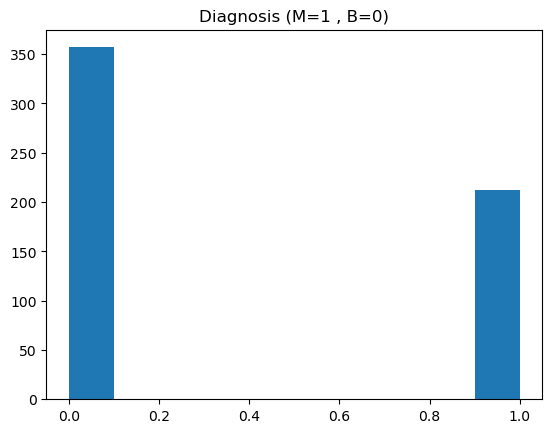




After id feature is set as row index: 
           diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302            1        17.99         10.38          122.80     1001.0   
842517            1        20.57         17.77          132.90     1326.0   
84300903          1        19.69         21.25          130.00     1203.0   
84348301          1        11.42         20.38           77.58      386.1   
84358402          1        20.29         14.34          135.10     1297.0   
...             ...          ...           ...             ...        ...   
926424            1        21.56         22.39          142.00     1479.0   
926682            1        20.13         28.25          131.20     1261.0   
926954            1        16.60         28.08          108.30      858.1   
927241            1        20.60         29.33          140.10     1265.0   
92751             0         7.76 

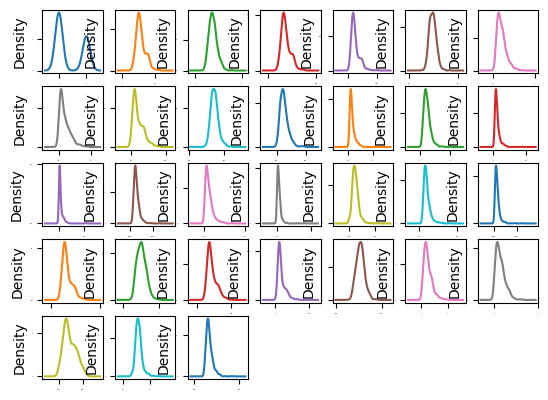

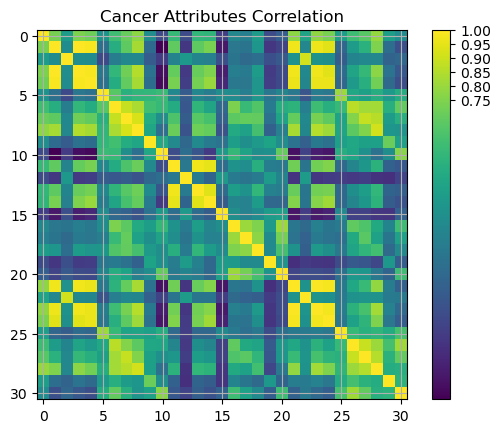

CART   :   0.902901 (0.040809) (run time: 0.069451)
SVM    :   0.921323 (0.046931) (run time: 0.026984)
NB     :   0.939474 (0.044113) (run time: 0.009557)
KNN    :   0.921188 (0.040857) (run time: 0.034481)


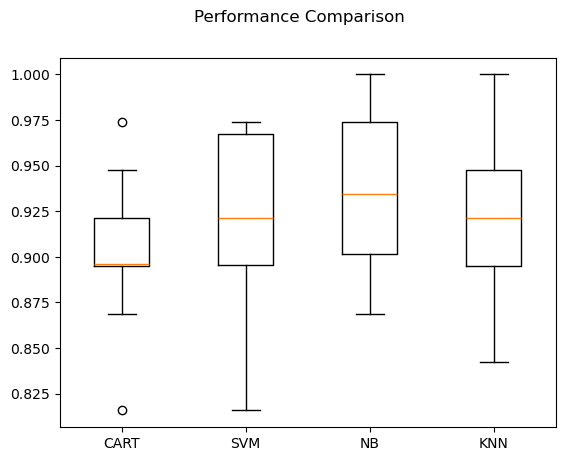




Accuracies of algorithm after scaled dataset

ScaledCART: 0.908165 (0.033708) (run time: 0.076512)
ScaledSVM: 0.973684 (0.026316) (run time: 0.035245)
ScaledNB: 0.928947 (0.044113) (run time: 0.018795)
ScaledKNN: 0.955331 (0.033429) (run time: 0.042805)


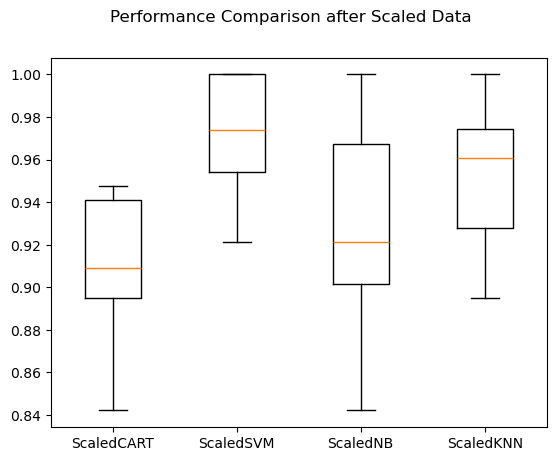

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
import time

import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', None)




#Exploratory data analysis(EDA)
data = pd.read_csv('BrainTumorData.csv', index_col=False)
print("\n\n\nSample BrainTumor dataset head(5) :- \n\n", data.head(5) )


print("\n\n\nShape of the BrainTumor dataset  data.shape = ", end="")
print( data.shape)
#(569, 33)


print("\n\n\nBrainTumor data decription : \n")
print( data.describe() )



#Data visualisation and pre-processing

print( "\n\n\ndata.diagnosis.unique() : " , data.diagnosis.unique() )


#Replace M = 1   and B = 0
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})


print("\n\n\nAfter updation of  diagnosis feature: \n", data.head() )


plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()


data = data.set_index('id')
print("\n\n\nAfter id feature is set as row index: \n", data)


del data['Unnamed: 32']
print("\n\nAfter Deletion of 'Unnamed: 32' column\n", data)




print("\n\n\ndata.groupby('diagnosis').size()\n")
print(data.groupby('diagnosis').size())




data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()


from matplotlib import cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(data.corr(), interpolation="none")
ax1.grid(True)
plt.title('Cancer Attributes Correlation')

fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()






Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values


X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.33, random_state=21)



models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))


num_folds = 10

results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    start_Time = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end_Time = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%-7s: %10f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end_Time-start_Time))


fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []

print("\n\n\nAccuracies of algorithm after scaled dataset\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))


#Performance Comparison after Scaled Data
#----------------------------------------

fig = plt.figure()
fig.suptitle('Performance Comparison after Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
